Import relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Data

In [2]:
data = pd.read_csv('data/ex2data1.txt', names=['x1','x2','y'])
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.shape

(100, 3)

In [4]:
x_raw = np.asarray(data[["x1","x2"]])
y_raw = np.asarray(data["y"])

In [29]:
def plot(x, y):
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.plot(x[pos, 0], x[pos, 1], 'k+', marker='+', c='b')
    plt.plot(x[neg, 0], x[neg, 1], 'ko', c='y')
    plt.legend(['Admitted', 'Not admitted'])

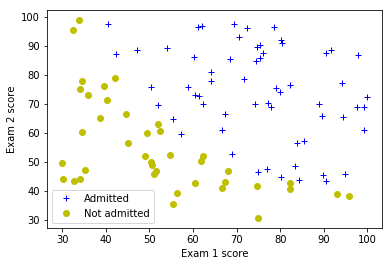

In [30]:
plot(x_raw, y_raw)

In [31]:
# add x0 to the feature matrix
X = np.hstack((np.ones_like(y_raw)[:,None],x_raw))
y = y_raw.reshape(-1,1)

Create Sigmoid Function

In [32]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [33]:
def compute_cost(initial_theta, x, y):
    m = x[:,0].size
    h = sigmoid(x @ initial_theta)
    J = None
    J = 1/m *(-np.log(h).T @ y - np.log(1-h).T @ (1-y))[0]
    
    return J

In [34]:
def gradient(theta, x, y):
    m = x[:,0].size
    h = sigmoid(x.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*x.T.dot(h-y)

    return(grad.flatten())

In [35]:
initial_theta = np.zeros(X.shape[1])
cost = compute_cost(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad.shape)

Cost: 
 0.6931471805599453
Grad: 
 (3,)


Scipy minimize function

`scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)`

In [36]:
from scipy.optimize import minimize

In [37]:
res = minimize(compute_cost, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})

C:\Users\Kenechi.Dukor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\Kenechi.Dukor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in matmul
  """


In [38]:
# this will return the trained weights
res.x

array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [39]:
def Test(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [40]:
p = Test(res.x, X) 
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 89.0%


In [41]:
def test_plot(x, y, exam_1, exam_2):
    plot(x_raw, y_raw)
    if(exam_1 and exam_2 == None):
        x1_min, x1_max = x_raw[:,0].min(), x_raw[:,0].max()
        x2_min, x2_max = x_raw[:,1].min(), x_raw[:,1].max()
        xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
        x_test = np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()]
        h = sigmoid(x_test @ res.x)
        h = h.reshape(xx1.shape)
        plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
        plt.legend(['Admitted', 'Not admitted'])
    else:
        x1_min, x1_max = x_raw[:,0].min(), x_raw[:,0].max()
        x2_min, x2_max = x_raw[:,1].min(), x_raw[:,1].max()
        xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
        x_test = np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()]
        h = sigmoid(x_test @ res.x)
        h = h.reshape(xx1.shape)
        plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
        plt.scatter(exam_1, exam_2, s=60, c='g', marker='v')
#         plt.legend(['Admitted', 'Not admitted', "pred_pos"])

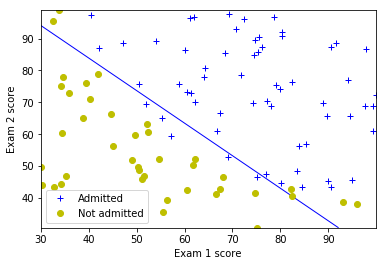

In [42]:
test_plot(x_raw, y_raw, None, None)

In [48]:
def predict(trained_weight, x, y):
    input_1 = int(input("Enter Exam 1 Score: "))
    input_2 = int(input("Enter Exam 2 Score: "))

    z = trained_weight[0] + trained_weight[1]*input_1 + trained_weight[2]*input_2
    h = 1 / (1 + np.exp(-z)) #sigmoid

    prob = h
    print('Admission probability is: ', prob, "\n")
    test_plot(x, y, input_1, input_2)
    
    if (prob >= 0.5):
        print("This student has higher chances of gaining admission")
    else:
        print("This student has lower chances of gaining admission")

Enter Exam 1 Score: 45
Enter Exam 2 Score: 85
Admission probability is:  0.7762907240588942 

This student has higher chances of gaining admission


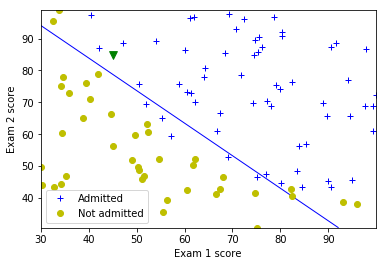

In [49]:
predict(res.x, x_raw, x_raw)

Notice the position of the green marker. it reflects the position of your input on the regression plot

## Regularised Logistic Regression

In [25]:
data2 = pd.read_csv('data/ex2data2.txt', names=['x1','x2','y'])
data2.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [23]:
data2.shape

(118, 3)

In [26]:
x2_raw = np.asarray(data2[["x1","x2"]])
y2_raw = np.asarray(data2["y"])

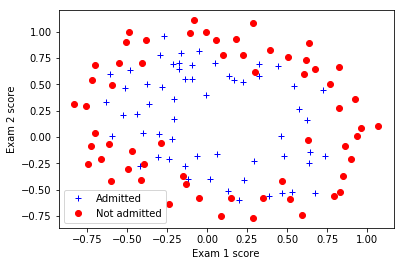

In [28]:
plot(x2_raw, y2_raw)

In [50]:
from sklearn.preprocessing import PolynomialFeatures